In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train_updated.csv")

In [3]:
df.sample(5)

x           y
360  99  100.095370
536  25   25.269719
537  34   36.332944
488  62   64.948411
366  11   10.766697

In [4]:
test_size=int(len(df)*0.2)

In [5]:
xtest=df[:test_size]['x'].values
xtrain=df[test_size:]['y'].values

ytest=df[:test_size]['x'].values
ytrain=df[test_size:]['y'].values

In [6]:
def z_score_normalize(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_norm = ((X - X_mean) / (X_std+1e-9)).reshape((X.shape))
    return X_norm

In [7]:
xtrain_norm=z_score_normalize(xtrain)
xtest_norm=z_score_normalize(xtest)

In [8]:
def yhat(w,b,x):
    yhat=w*x+b
    
    return yhat

In [9]:
def cost(w,b,x,y):
    m=x.shape[0]
    yhat_=yhat(w,b,x)
    error=yhat_-y
    cost=(1/2*m)*(np.dot(error.T,error))
    
    return cost

In [10]:
def gradient_descent(w,b,x,y):
    m=x.shape[0]
    yhat_=yhat(w,b,x)
    error=yhat_-y
    dw=(1/m)*np.dot(error.T,x)
    db=(1/m)*np.sum(error)
    
    return dw,db

In [11]:
def linear_regression(x,y,epochs,alpha):
    w=0
    b=0
    it=[]
    cost_=[]
    for i in range(epochs):
        costi=cost(w,b,x,y)
        dw,db=gradient_descent(w,b,x,y)
        w-=alpha*dw
        b-=alpha*db
        
        cost_.append(costi)
        it.append(i)
        
        if(i%25==0):
            plt.figure(figsize=(2.5,2.5))
            plt.title(f"After {i+1} iteration line obtained")
            plt.xlabel("X")
            plt.ylabel("Y")
            plt.scatter(x,y,marker='+')
            plt.plot(x,w*x+b,c='r')
            plt.show()
            print(f"After {i+1} iteration cost is {np.round(costi,5)}")
            print("\n----------------------------------------------------------------------\n")
    
    print(f"\nFINAL COST IS {cost_[-1]}\n")
        
    return w,b,cost_,it

After 1 iteration cost is 550927067.33158

----------------------------------------------------------------------



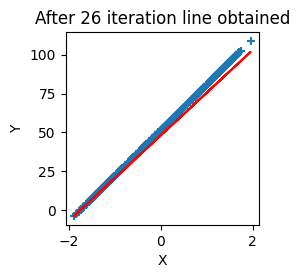

After 26 iteration cost is 2839354.26092

----------------------------------------------------------------------



After 51 iteration cost is 14633.3936

----------------------------------------------------------------------



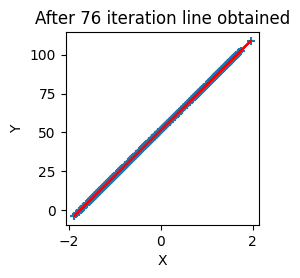

After 76 iteration cost is 75.41722

----------------------------------------------------------------------



After 101 iteration cost is 0.38868

----------------------------------------------------------------------



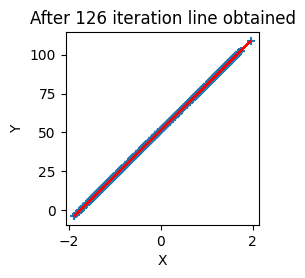

After 126 iteration cost is 0.002

----------------------------------------------------------------------


FINAL COST IS 1.2745648062962524e-05



In [12]:
w,b,cost_,it=linear_regression(xtrain_norm,ytrain,epochs=150,alpha=0.1)

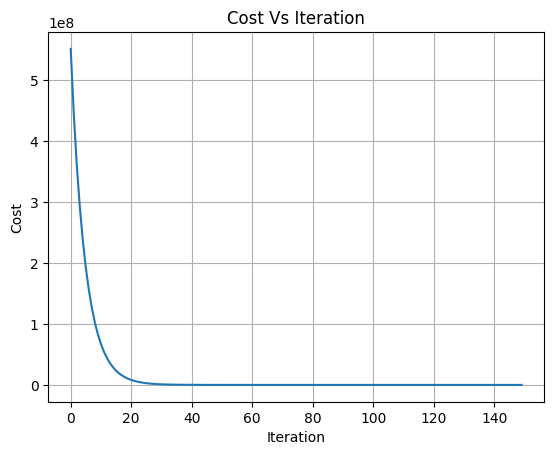

In [13]:
plt.plot(it,cost_)
plt.title("Cost Vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

In [14]:
ypred_train=yhat(w,b,xtrain_norm)
ypred_test=yhat(w,b,xtest_norm)

In [15]:
def R2(y,y_pred):
    a=np.sum((y-y_pred)**2)
    b=np.sum((y-y.mean())**2)
    r2=1-(a)/(b)
    return np.round(r2,6)

In [16]:
def maketable(actual,prediction,n):
    df_=pd.DataFrame({"Actual Value":actual[:n],
                     "Predicted Value":prediction[:n],
                     "Difference":actual[:n]-prediction[:n]})
    return df_.head(n)

## Actual Vs Prediction for training Dataset

In [17]:
maketable(ytrain,ypred_train,20)

Actual Value  Predicted Value    Difference
0      53.251662        53.251654  7.289699e-06
1      59.162366        59.162358  8.098824e-06
2      75.241484        75.241474  1.029992e-05
3      28.223258        28.223254  3.863524e-06
4      25.333237        25.333234  3.467904e-06
5       6.364616         6.364615  8.712616e-07
6      95.460922        95.460909  1.306779e-05
7      88.641838        88.641825  1.213431e-05
8      58.703187        58.703179  8.035966e-06
9       6.815491         6.815490  9.329827e-07
10     99.403947        99.403933  1.360755e-05
11     32.770492        32.770488  4.486001e-06
12     47.058679        47.058672  6.441932e-06
13     60.533218        60.533209  8.286482e-06
14     40.309299        40.309293  5.517999e-06
15     89.422227        89.422215  1.224114e-05
16     86.821321        86.821309  1.188510e-05
17     26.116975        26.116972  3.575191e-06
18     53.266576        53.266569  7.291740e-06
19     96.623279        96.623266  1.322690e-05

In [18]:
print(f"R2 score = {R2(ytrain,ypred_train)}")

R2 score = 1.0


## Actual Vs Prediction for Test Dataset

In [19]:
maketable(ytest,ypred_test,20)

Actual Value  Predicted Value  Difference
0             24        29.997631   -5.997631
1             50        58.148076   -8.148076
2             15        20.253247   -5.253247
3             38        45.155563   -7.155563
4             87        98.208324  -11.208324
5             36        42.990144   -6.990144
6             12        17.005118   -5.005118
7             81        91.712068  -10.712068
8             25        31.080341   -6.080341
9              5         9.426152   -4.426152
10            16        21.335956   -5.335956
11            16        21.335956   -5.335956
12            24        29.997631   -5.997631
13            39        46.238272   -7.238272
14            54        62.478914   -8.478914
15            60        68.975170   -8.975170
16            26        32.163050   -6.163050
17            73        83.050392  -10.050392
18            29        35.411178   -6.411178
19            31        37.576597   -6.576597

In [20]:
print(f"R2 score = {R2(ytest,ypred_test)}")

R2 score = 0.913929
